# Multiplatform Engagement Analysis

Analisis keterlibatan pengguna antara Twitter dan platform lain (YouTube, Instagram, dll).


## Langkah 1: Pengaturan Environment dan Unduh Dataset

In [ ]:
!pip install pandas scikit-learn transformers datasets --quiet

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d goyaladi/twitter-dataset -p /content/twitter_data --unzip
!kaggle datasets download -d subashmaster0411/social-media-engagement-dataset -p /content/multiplatform_data --unzip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/goyaladi/twitter-dataset
License(s): CC0-1.0
  0% 0.00/1.02M [00:00<?, ?B/s]
100% 1.02M/1.02M [00:00<00:00, 388MB/s]
Dataset URL: https://www.kaggle.com/datasets/subashmaster0411/social-media-engagement-dataset
License(s): CC0-1.0
  0% 0.00/1.30M [00:00<?, ?B/s]
100% 1.30M/1.30M [00:00<00:00, 76.4MB/s]


## Langkah 2: Load dan Preprocessing Data

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import MinMaxScaler

# Fungsi bersihkan teks
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Load Dataset
df_twitter = pd.read_csv('/content/twitter_data/twitter_dataset.csv', encoding='latin1', low_memory=False)
df_multi = pd.read_csv('/content/multiplatform_data/Social Media Engagement Dataset.csv', low_memory=False)

# Bersihkan kolom & filter non-Twitter
df_twitter.columns = df_twitter.columns.str.strip()
df_multi.columns = df_multi.columns.str.strip()
df_non_twitter = df_multi[df_multi['platform'].str.lower().str.strip() != 'twitter']

# Twitter
df_twitter['text'] = df_twitter['Text'].apply(preprocess_text)
df_twitter['engagement_score'] = df_twitter['Retweets']  # Gunakan Retweets sebagai metrik utama

# Non-Twitter
df_non_twitter['text'] = df_non_twitter['text_content'].apply(preprocess_text)
df_non_twitter['engagement_score'] = (
    df_non_twitter['likes_count'].fillna(0) +
    df_non_twitter['shares_count'].fillna(0) +
    df_non_twitter['comments_count'].fillna(0)
)

df_twitter = df_twitter.dropna(subset=['text', 'engagement_score'])
df_non_twitter = df_non_twitter.dropna(subset=['text', 'engagement_score'])

scaler_twitter = MinMaxScaler()
scaler_non_twitter = MinMaxScaler()

df_twitter['engagement_score_norm'] = scaler_twitter.fit_transform(df_twitter[['engagement_score']])
df_twitter['engagement_score_log'] = np.log1p(df_twitter['engagement_score'])

df_non_twitter['engagement_score_norm'] = scaler_non_twitter.fit_transform(df_non_twitter[['engagement_score']])
df_non_twitter['engagement_score_log'] = np.log1p(df_non_twitter['engagement_score'])

twitter_clean = df_twitter[['text', 'engagement_score', 'engagement_score_norm', 'engagement_score_log']].dropna()
non_twitter_clean = df_non_twitter[['text', 'engagement_score', 'engagement_score_norm', 'engagement_score_log']].dropna()

# Tampilkan beberapa baris pertama dari data Twitter
print("== Sample Twitter Cleaned Data ==")
print(twitter_clean.head(), "\n")

# Tampilkan beberapa baris pertama dari data Non-Twitter
print("== Sample Non-Twitter Cleaned Data ==")
print(non_twitter_clean.head(), "\n")

# Statistik dasar untuk kolom engagement_score & hasil transformasi
print("== Statistik Ringkasan - Twitter ==")
print(twitter_clean[['engagement_score', 'engagement_score_norm', 'engagement_score_log']].describe(), "\n")

print("== Statistik Ringkasan - Non-Twitter ==")
print(non_twitter_clean[['engagement_score', 'engagement_score_norm', 'engagement_score_log']].describe())

== Sample Twitter Cleaned Data ==
                                                text  engagement_score  \
0  party least receive say or single prevent prev...                 2   
1  hotel still congress may member staff media dr...                35   
2  nice be her debate industry that year film whe...                51   
3  laugh explain situation career occur serious f...                37   
4  involve sense former often approach government...                27   

   engagement_score_norm  engagement_score_log  
0                   0.02              1.098612  
1                   0.35              3.583519  
2                   0.51              3.951244  
3                   0.37              3.637586  
4                   0.27              3.332205   

== Sample Non-Twitter Cleaned Data ==
                                                text  engagement_score  \
0  just tried the chromebook from google best pur...              3669   
2  whats your opinion about nikes epic 

/tmp/ipython-input-1325361227.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_twitter['text'] = df_non_twitter['text_content'].apply(preprocess_text)
/tmp/ipython-input-1325361227.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_twitter['engagement_score'] = (


In [ ]:
print(df_twitter.columns.tolist())
print(df_multi.columns.tolist())
print("Kolom df_twitter:", df_twitter.columns.tolist())


['Tweet_ID', 'Username', 'Text', 'Retweets', 'Likes', 'Timestamp', 'text', 'engagement_score']
['post_id', 'timestamp', 'day_of_week', 'platform', 'user_id', 'location', 'language', 'text_content', 'hashtags', 'mentions', 'keywords', 'topic_category', 'sentiment_score', 'sentiment_label', 'emotion_type', 'toxicity_score', 'likes_count', 'shares_count', 'comments_count', 'impressions', 'engagement_rate', 'brand_name', 'product_name', 'campaign_name', 'campaign_phase', 'user_past_sentiment_avg', 'user_engagement_growth', 'buzz_change_rate']
Kolom df_twitter: ['Tweet_ID', 'Username', 'Text', 'Retweets', 'Likes', 'Timestamp', 'text', 'engagement_score']


## Langkah 3: Ekstraksi Fitur menggunakan BERTweet

In [ ]:
!pip install emoji==0.6.0

from transformers import AutoTokenizer, AutoModel
import torch

# Fungsi ekstraksi embedding
def get_bert_embeddings(texts):
    tokenizer = AutoTokenizer.from_pretrained('vinai/bertweet-base')
    model = AutoModel.from_pretrained('vinai/bertweet-base')
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    model.eval()

    encoded_input = tokenizer(texts, padding=True, truncation=True, return_tensors='pt', max_length=128)
    encoded_input = {k: v.to(device) for k, v in encoded_input.items()}

    with torch.no_grad():
        output = model(**encoded_input)

    embeddings = output.last_hidden_state[:, 0, :].cpu().numpy()  # [CLS] token
    return embeddings

# Ambil 500 data dari Twitter dan Non-Twitter
X_twitter = get_bert_embeddings(twitter_clean['text'].tolist()[:500])
y_twitter = twitter_clean['engagement_score_log'].values[:500]

X_non_twitter = get_bert_embeddings(non_twitter_clean['text'].tolist()[:500])
y_non_twitter = non_twitter_clean['engagement_score_log'].values[:500]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49719 sha256=e3c8be3f879a3cfd59a36b355892b291818e18be5a99fc8f87b6a067cca967e1
  Stored in directory: /root/.cache/pip/wheels/b7/23/31/f9b93f25b95da9b91729c4cd5f35a2b692ab06f688f6759630
Successfully built emoji


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/558 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

bpe.codes: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


## Langkah 4: Pelatihan dan Evaluasi Model


=== Ringkasan MAE ===
Twitter -> Non-Twitter: 4.2871
Non-Twitter -> Twitter: 4.9212
Baseline (Twitter):     0.9073


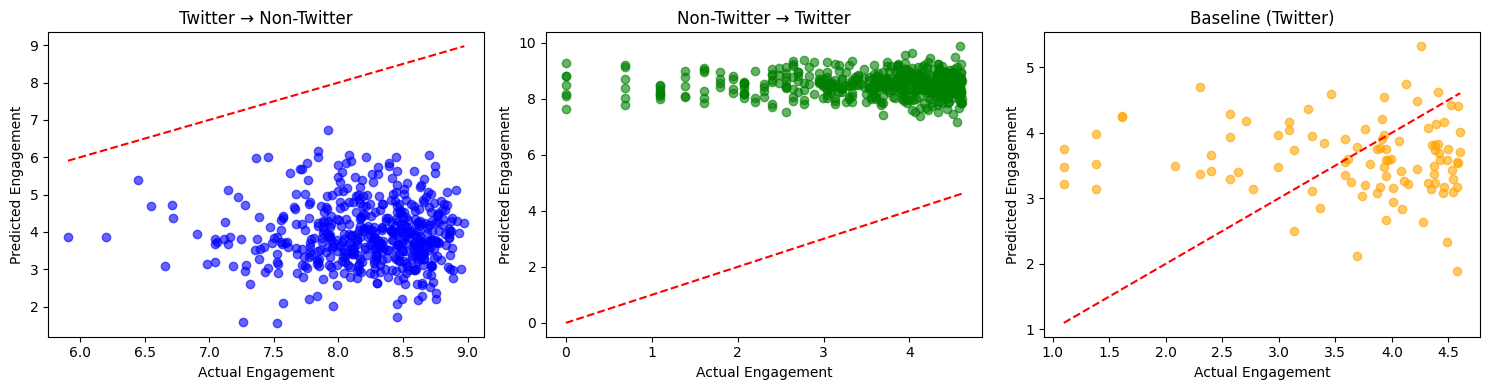

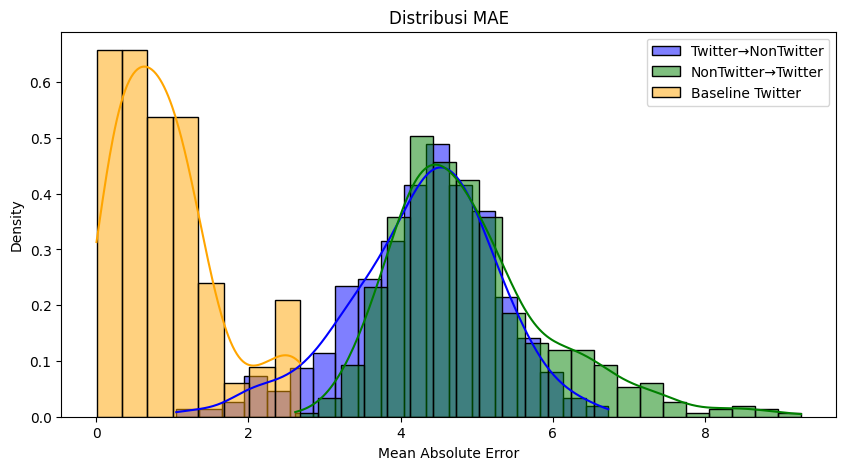

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

model_reg = Ridge(alpha=1.0)

model_reg.fit(X_twitter, y_twitter)
pred_non_twitter = model_reg.predict(X_non_twitter)
mae_twitter2non = mean_absolute_error(y_non_twitter, pred_non_twitter)

model_reg.fit(X_non_twitter, y_non_twitter)
pred_twitter = model_reg.predict(X_twitter)
mae_non2twitter = mean_absolute_error(y_twitter, pred_twitter)

X_train, X_test, y_train, y_test = train_test_split(X_twitter, y_twitter, test_size=0.2, random_state=42)
model_reg.fit(X_train, y_train)
preds = model_reg.predict(X_test)
mae_baseline = mean_absolute_error(y_test, preds)

print("\n=== Ringkasan MAE ===")
print(f"Twitter -> Non-Twitter: {mae_twitter2non:.4f}")
print(f"Non-Twitter -> Twitter: {mae_non2twitter:.4f}")
print(f"Baseline (Twitter):     {mae_baseline:.4f}")

# === VISUALISASI ===
# 1. Scatter plot prediksi vs aktual
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.scatter(y_non_twitter[:len(pred_non_twitter)], pred_non_twitter, alpha=0.6, color='blue')
plt.plot([y_non_twitter.min(), y_non_twitter.max()],
         [y_non_twitter.min(), y_non_twitter.max()], 'r--')
plt.title('Twitter → Non-Twitter')
plt.xlabel('Actual Engagement')
plt.ylabel('Predicted Engagement')

plt.subplot(1, 3, 2)
plt.scatter(y_twitter[:len(pred_twitter)], pred_twitter, alpha=0.6, color='green')
plt.plot([y_twitter.min(), y_twitter.max()],
         [y_twitter.min(), y_twitter.max()], 'r--')
plt.title('Non-Twitter → Twitter')
plt.xlabel('Actual Engagement')
plt.ylabel('Predicted Engagement')

plt.subplot(1, 3, 3)
plt.scatter(y_test, preds, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.title('Baseline (Twitter)')
plt.xlabel('Actual Engagement')
plt.ylabel('Predicted Engagement')

plt.tight_layout()
plt.show()

# 2. Histogram error distribusi
errors_cross1 = abs(y_non_twitter[:len(pred_non_twitter)] - pred_non_twitter)
errors_cross2 = abs(y_twitter[:len(pred_twitter)] - pred_twitter)
errors_base = abs(y_test - preds)

plt.figure(figsize=(10, 5))
sns.histplot(errors_cross1, label='Twitter→NonTwitter', color='blue', kde=True, stat='density')
sns.histplot(errors_cross2, label='NonTwitter→Twitter', color='green', kde=True, stat='density')
sns.histplot(errors_base, label='Baseline Twitter', color='orange', kde=True, stat='density')
plt.title('Distribusi MAE')
plt.xlabel('Mean Absolute Error')
plt.ylabel('Density')
plt.legend()
plt.show()


                   Model       MAE
0  Twitter → Non-Twitter  4.287107
1  Non-Twitter → Twitter  4.921165
2       Baseline Twitter  0.907268


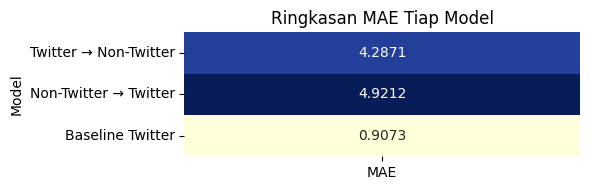

/tmp/ipython-input-1892376641.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Platform", y="Engagement Score", data=score_data, palette="Set2")


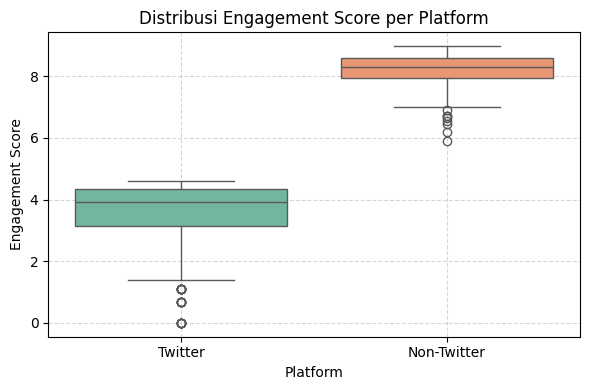

In [ ]:
import pandas as pd

# Simpan hasil MAE ke dictionary
mae_results = {
    "Model": [
        "Twitter → Non-Twitter",
        "Non-Twitter → Twitter",
        "Baseline Twitter"
    ],
    "MAE": [
        mae_twitter2non,
        mae_non2twitter,
        mae_baseline
    ]
}

# Buat dataframe
mae_df = pd.DataFrame(mae_results)
print(mae_df)

# Visualisasi tabel sederhana
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 2))
sns.heatmap(mae_df.set_index("Model"), annot=True, cmap="YlGnBu", fmt=".4f", cbar=False)
plt.title("Ringkasan MAE Tiap Model")
plt.tight_layout()
plt.show()

# Asumsikan y_twitter dan y_non_twitter sudah ada
score_data = pd.DataFrame({
    "Engagement Score": list(y_twitter) + list(y_non_twitter),
    "Platform": ["Twitter"] * len(y_twitter) + ["Non-Twitter"] * len(y_non_twitter)
})

plt.figure(figsize=(6, 4))
sns.boxplot(x="Platform", y="Engagement Score", data=score_data, palette="Set2")
plt.title("Distribusi Engagement Score per Platform")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import pearsonr

# Korelasi nilai aktual dan prediksi
corr_t2nt, _ = pearsonr(y_non_twitter, pred_non_twitter)
corr_nt2t, _ = pearsonr(y_twitter, pred_twitter)
corr_baseline, _ = pearsonr(y_test, preds)

print(f"Korelasi Twitter → Non-Twitter: {corr_t2nt:.4f}")
print(f"Korelasi Non-Twitter → Twitter: {corr_nt2t:.4f}")
print(f"Korelasi Baseline Twitter: {corr_baseline:.4f}")


Korelasi Twitter → Non-Twitter: -0.0127
Korelasi Non-Twitter → Twitter: 0.0193
Korelasi Baseline Twitter: -0.0825


## Langkah 5: Interpretasi Hasil dan Diskusi

- Bandingkan MAE Twitter -> Non-Twitter dan Non-Twitter -> Twitter dengan baseline.
- Jika MAE lintas platform tidak jauh dari baseline, maka pola bahasa bersifat umum.
- Jika jauh berbeda, ada kemungkinan gaya bahasa tiap platform sangat spesifik.


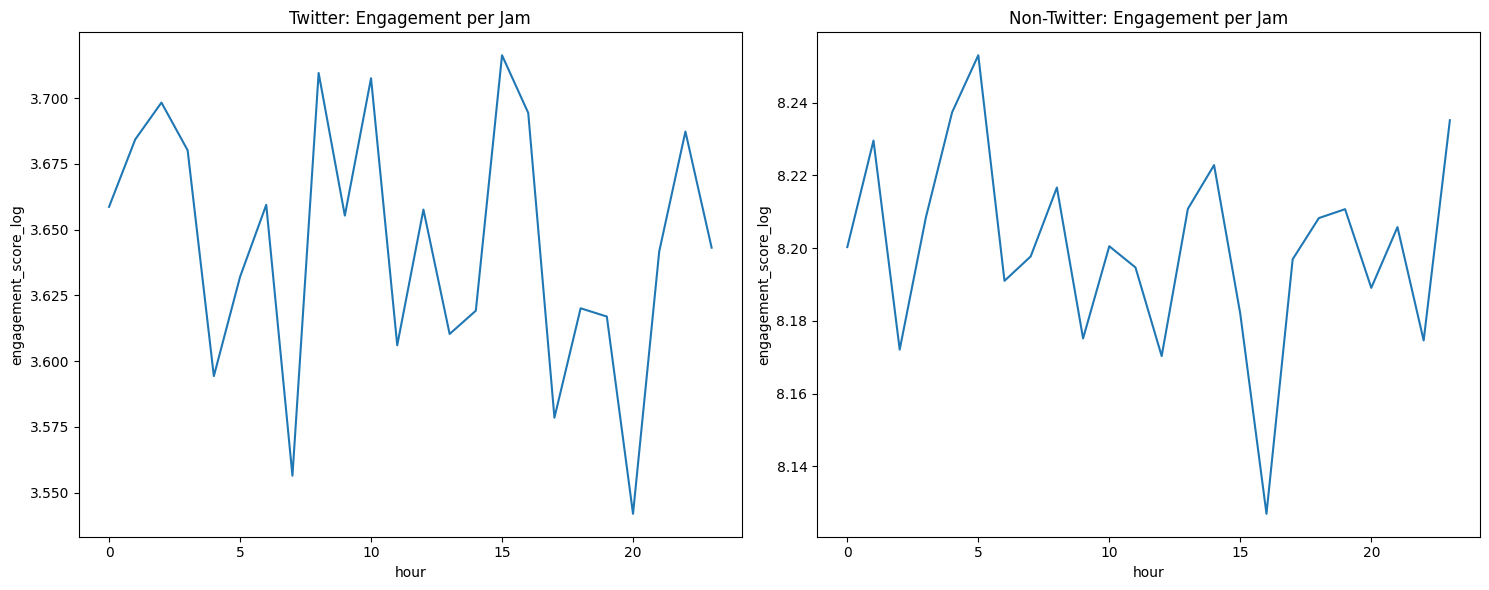

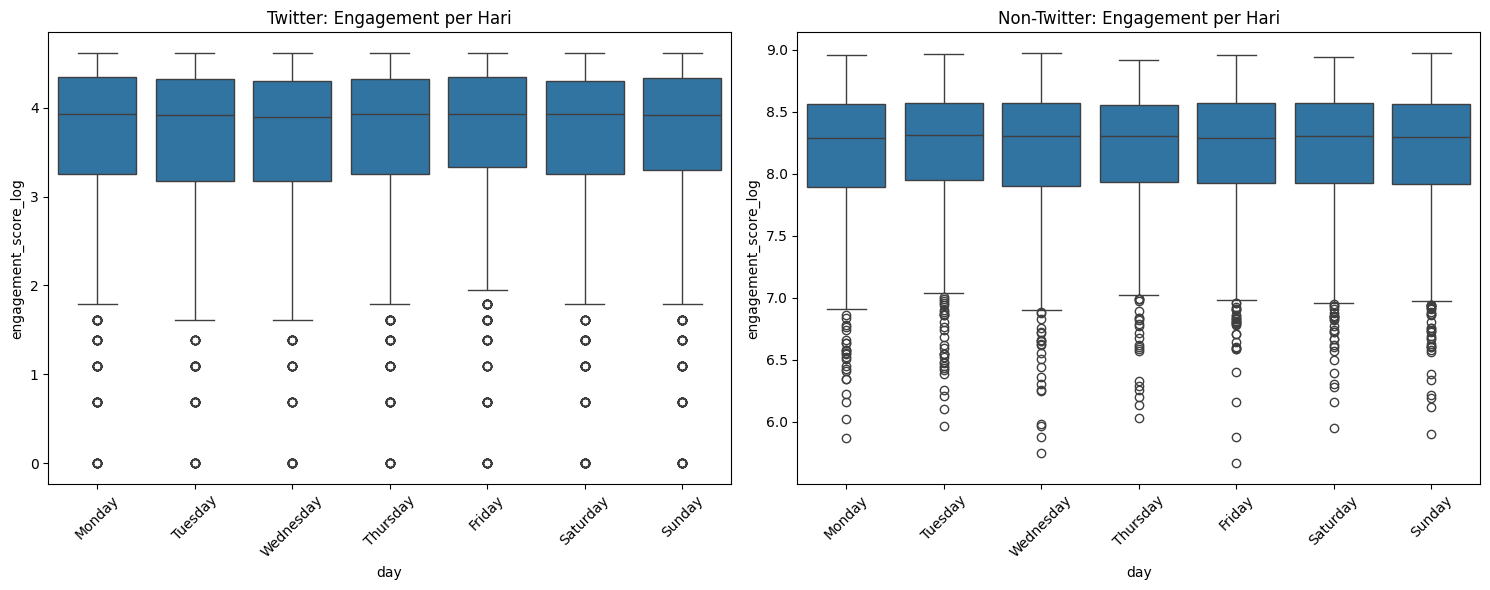

In [ ]:
# Ekstrak informasi waktu
df_twitter['Timestamp'] = pd.to_datetime(df_twitter['Timestamp'])
df_twitter['hour'] = df_twitter['Timestamp'].dt.hour
df_twitter['day'] = df_twitter['Timestamp'].dt.day_name()

df_non_twitter['timestamp'] = pd.to_datetime(df_non_twitter['timestamp'])
df_non_twitter['hour'] = df_non_twitter['timestamp'].dt.hour
df_non_twitter['day'] = df_non_twitter['timestamp'].dt.day_name()

# Analisis pola waktu
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='hour', y='engagement_score_log', data=df_twitter, errorbar=None)
plt.title('Twitter: Engagement per Jam')

plt.subplot(1, 2, 2)
sns.lineplot(x='hour', y='engagement_score_log', data=df_non_twitter, errorbar=None)
plt.title('Non-Twitter: Engagement per Jam')

plt.tight_layout()
plt.show()

# Analisis pola hari
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='day', y='engagement_score_log', data=df_twitter,
           order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Twitter: Engagement per Hari')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='day', y='engagement_score_log', data=df_non_twitter,
           order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Non-Twitter: Engagement per Hari')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

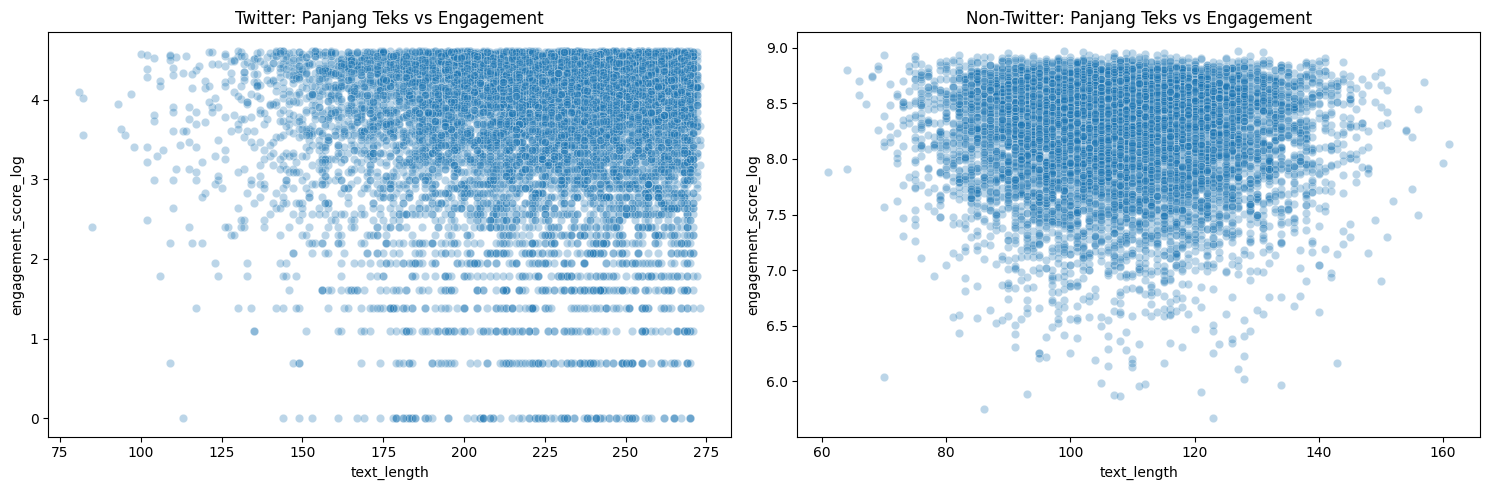

Korelasi Panjang Teks-Engagement (Twitter): 0.0120
Korelasi Panjang Teks-Engagement (Non-Twitter): -0.0076


In [ ]:
twitter_clean['text_length'] = twitter_clean['text'].apply(len)
non_twitter_clean['text_length'] = non_twitter_clean['text'].apply(len)

# Visualisasi hubungan panjang teks-engagement
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='text_length', y='engagement_score_log', data=twitter_clean, alpha=0.3)
plt.title('Twitter: Panjang Teks vs Engagement')

plt.subplot(1, 2, 2)
sns.scatterplot(x='text_length', y='engagement_score_log', data=non_twitter_clean, alpha=0.3)
plt.title('Non-Twitter: Panjang Teks vs Engagement')

plt.tight_layout()
plt.show()

# Korelasi panjang teks-engagement
twitter_len_corr = twitter_clean[['text_length', 'engagement_score_log']].corr().iloc[0,1]
non_twitter_len_corr = non_twitter_clean[['text_length', 'engagement_score_log']].corr().iloc[0,1]

print(f"Korelasi Panjang Teks-Engagement (Twitter): {twitter_len_corr:.4f}")
print(f"Korelasi Panjang Teks-Engagement (Non-Twitter): {non_twitter_len_corr:.4f}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

def evaluate_transfer(X_source, y_source, X_target, y_target, model):
    model.fit(X_source, y_source)
    preds = model.predict(X_target)
    mae = mean_absolute_error(y_target, preds)
    corr, _ = pearsonr(y_target, preds)
    return mae, corr

# Uji berbagai model
models = {
    'Ridge': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', C=1.0)
}

results = []
for name, model in models.items():
    # Twitter ke Non-Twitter
    mae_t2nt, corr_t2nt = evaluate_transfer(X_twitter, y_twitter, X_non_twitter, y_non_twitter, model)

    # Non-Twitter ke Twitter
    mae_nt2t, corr_nt2t = evaluate_transfer(X_non_twitter, y_non_twitter, X_twitter, y_twitter, model)

    results.append({
        'Model': name,
        'Twitter->Non-Twitter MAE': mae_t2nt,
        'Twitter->Non-Twitter Corr': corr_t2nt,
        'Non-Twitter->Twitter MAE': mae_nt2t,
        'Non-Twitter->Twitter Corr': corr_nt2t
    })

# Tampilkan hasil
results_df = pd.DataFrame(results)
print("\nPerbandingan Model Transfer Learning:")
print(results_df)


Perbandingan Model Transfer Learning:
           Model  Twitter->Non-Twitter MAE  Twitter->Non-Twitter Corr  \
0          Ridge                  4.287107                  -0.012652   
1  Random Forest                  5.248698                  -0.002802   
2            SVR                  4.311824                  -0.051801   

   Non-Twitter->Twitter MAE  Non-Twitter->Twitter Corr  
0                  4.921165                   0.019289  
1                  4.227160                  -0.001209  
2                  4.916970                   0.025834  
